## KONUT FİYATLARINI TAHMİN ETME VERİ SETİ

Veri seti, Zillow'un ev değeri tahmini kaggle rekabet verilerinden uyarlanmıştır. Öz nitelik sayısı azaltılıp, konut fiyatları medyan değerinin üstünde veya altında olarak ikili hale getirilmiştir.

#### Problem: Özniteliklere bağlı olarak konut fiyatlarını tahmin edecek derin öğrenme yapısı kurmak.

## 1.Adım: Veri İşleme

In [22]:
from pandas import read_csv
import pandas as pd
# url= "https://www.kaggle.com/datasets/krishcy25/housepricesdata"
df = pd.read_csv("C:/Users/ozgee/OneDrive/Masaüstü/makine öğrenimi dersleri/derinögrenme/housepricedata.csv")
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


* LotArea(Zemin alanı)
* Overall Quality(Genel Kalite)
* Overall Condition(Genel Durum)
* Total Basement Area(Toplam Bodrum Alanı)
* Number of Full Bathrooms(Tam Banyo Sayısı)
* Number Of Half Bathrooms(Yarım Banyo Sayısı)
* Number of Bedrooms(Yatak Odası Sayısı)
* Total Number of Fireplaces(Şömine Sayısı)
* Garage Area(Garaj Alanı)
* Son sütun tahmin edilmek istenen hedef değişkeni

In [23]:
# Konut fiyatı ortancanın üstünde mi değil mi?(E:1, H:0)
# Makinemizin işlemesi için dizilere dönüştürmek istiyoruz.

In [24]:
veriseti = df.values
veriseti

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

 Veri kümemizi öznitelikleri(X) ve tahmin etmek istediğimiz hedef değişkeni olarak(Y) böldük. Bunu yapmak içinde dizinin ilk 10  sütunu "X" adlı bir değişkene ve dizinin son sütunu "Y" adlı bir değişkene atadık.

In [25]:
X = veriseti[:,0:10]
print(X)

[[ 8450     7     5 ...     8     0   548]
 [ 9600     6     8 ...     6     1   460]
 [11250     7     5 ...     6     1   608]
 ...
 [ 9042     7     9 ...     9     2   252]
 [ 9717     5     6 ...     5     0   240]
 [ 9937     5     6 ...     6     0   276]]


In [26]:
Y = veriseti[:,10]
print(Y)

[1 1 1 ... 1 0 0]


In [27]:
# Verilerin ölçeklendirmenin bir yolu scikit-learn'den mevcut aşağıdaki paketi kullanmaktır.

In [28]:
from sklearn import preprocessing

 Daha sonra, veri kümesini ölçeklendiren min-max scaler adlı bir fonksiyon 
 kullanılarak 0 ile 1 arasında standartlaştırılır.
 
 Not: Sinir ağımızın eğitimine yardımcı olmak için kasıtlı olarak 0 ve 1'i seçtik.

 **Ölçeklendirilmiş veri kümemiz "X_scale" dizisinde saklanır. Eğer "X_scale" neye benzediğini görmek istiyorsak, X_scale yazmamız yeterlidir.

In [29]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
print(X_scale)

[[0.0334198  0.66666667 0.5        ... 0.5        0.         0.3864598 ]
 [0.03879502 0.55555556 0.875      ... 0.33333333 0.33333333 0.32440056]
 [0.04650728 0.66666667 0.5        ... 0.33333333 0.33333333 0.42877292]
 ...
 [0.03618687 0.66666667 1.         ... 0.58333333 0.66666667 0.17771509]
 [0.03934189 0.44444444 0.625      ... 0.25       0.         0.16925247]
 [0.04037019 0.44444444 0.625      ... 0.33333333 0.         0.19464034]]


Veri kümemizi bir eğitim kümesine, bir doğrulama kümesine ve bir test kümesine 
bölmek olan verileri işlemedeki son adıma geliyoruz. Bunun içinde "train_test_split" kodunu kullanacağız.

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# Veri kümesini tekrar bölelim.

In [32]:
# Bu kod, genel veri kümesinin %30'u dogrulama ve test veri seti olacak sekilde ayiracaktir.
# Kod, degisken adlarinin önerdigi gibi, bolunmus verileri esittir isaretinin solundaki ilk dort degiskene depolar.
X_egitim, X_dogrulama_ve_test, Y_egitim, Y_dogrulama_ve_test = train_test_split(X_scale, Y, test_size=0.3)

Üstteki fonksiyon yalnızca veri kümemizi ikiye bölmemize yardimci olur. Ayrı bir doğrulama seti ve test seti istediğimizden, bölünmeyi tekrar d için aynı fonksiyonu kullanabiliriz.

In [33]:
# Aşağıdaki kod, doğrulama ve test boyutunu doğrulama kümesine ve test kümesine eşit olarak böler.
X_dogrulama, X_test, Y_dogrulama, Y_test = train_test_split(X_dogrulama_ve_test, Y_dogrulama_ve_test, test_size=0.5)

* X_eğitim(10 öznitelik ve tam veri kümesinin %70'i)

* X_dogrulama(10 öznitelik ve tam veri kümesinin %15'i)

* X_test(10 öznitelik ve tam veri kümesinin %15'i)

* Y_egitim(1 hedef ve tam veri kümesinin %70'i)

* Y_dogrulama(1 hedef ve tam veri kümesinin %15'i)

* Y_test(1 hedef ve tam veri kümesinin %15'i)


In [34]:
# Dizilerin her biri için büyüklüklerini(yani hangi boyutlarda olduklarını) görmek için aşağıdaki kodları çalıştırmak gerekir

In [35]:
print(X_egitim.shape, X_dogrulama.shape, X_test.shape, Y_egitim.shape, Y_dogrulama.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


Yorum: Yani eğitim seti 1022 veri noktasına sahipken, doğrulama ve test seti her biri 219 veri noktasına sahiptir. X değişkenleri 10 özniteliğe sahipken, Y değişkenleri tahmin etmek için yalnızca bir hedef değişkeni sahiptir.

## 2. Adım: Sinir Ağlarını Eğitme ve Kurma 

** Derin öğrenmenin iki adımı

- Bir şablon(mimari) belirtmek

- Bu şablonu doldurmak için verilerden en iyi sayıları bulmak

###### 1- Mimariyi kurmada sinir ağına ihtiyaç var

--İnput tabakası: 10 nöron

--Gizli katman1 : 32 nöronlar, ReLU aktivasyon fonksiyonu

--Gizli katman 2: 32 nöronlar, ReLU aktivasyon foonksiyonu

--Output katmanı: 1 nöron, Sigmoid aktivasyon fonksiyonu


In [37]:
# Keras kütüphanesinde, Sequential modeli kullanılabilir.

In [38]:
pip install keras==2.9.0 

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install tensorflow

In [39]:
from keras.models import Sequential
from keras.layers import Dense

In [40]:
# model=sequential([..........])modelin model degiskeninde saklanmasi ve koseli
# parantezler arasinda sirayla(katman katman) tanimlanmasi icin kullanilir.
model= Sequential([           
    Dense(32, activation="relu", input_shape=(10,)),  # 10 öznitelige sahip, o yuzden giris sekli 10
    Dense(32, activation="relu"),   #giris seklini tanitmak zorunda degiliz.
    Dense(1,activation="sigmoid"),  #1 nöronlu bir dense katmani
])

###### 2- En iyi sayılara göre doldurma

In [41]:
# Optimazyon yapmak için hangi algoritmanın kullanılacağını belirleme
# Hangi kayıp fonksiyonun kullanılacağını belirleme
# Kayıp fonksiyonundan başka hangi metriklerin kullanılıcağını belirleme

In [42]:
model.compile(optimizer="sgd", loss="binary_crossentropy", metrics=["accuracy"])

In [43]:
hist=model.fit(X_egitim, Y_egitim, batch_size=32, epochs=100, validation_data=(X_dogrulama, Y_dogrulama))

Epoch 1/100
32/32 [==============================] - 1s 7ms/step - loss: 0.6933 - accuracy: 0.4814 - val_loss: 0.6844 - val_accuracy: 0.5571
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.5362 - val_loss: 0.6737 - val_accuracy: 0.5571
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6742 - accuracy: 0.5342 - val_loss: 0.6645 - val_accuracy: 0.5616
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6652 - accuracy: 0.5714 - val_loss: 0.6556 - val_accuracy: 0.6210
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6567 - accuracy: 0.6859 - val_loss: 0.6466 - val_accuracy: 0.6621
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6480 - accuracy: 0.6849 - val_loss: 0.6385 - val_accuracy: 0.7306
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6395 - accuracy: 0.7397 - val_loss: 0.6308 - val_accuracy: 0.7626
Epoch 8/100
3

Epoch 59/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3027 - accuracy: 0.8894 - val_loss: 0.3175 - val_accuracy: 0.8630
Epoch 60/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3009 - accuracy: 0.8885 - val_loss: 0.3167 - val_accuracy: 0.8630
Epoch 61/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2996 - accuracy: 0.8904 - val_loss: 0.3147 - val_accuracy: 0.8630
Epoch 62/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2977 - accuracy: 0.8894 - val_loss: 0.3134 - val_accuracy: 0.8676
Epoch 63/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2956 - accuracy: 0.8894 - val_loss: 0.3138 - val_accuracy: 0.8630
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2945 - accuracy: 0.8933 - val_loss: 0.3113 - val_accuracy: 0.8630
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2928 - accuracy: 0.8904 - val_loss: 0.3110 - val_accuracy: 0.8630
Epoch 

In [44]:
# Test setindeki doğruluğu görmek için:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 1ms/step - loss: 0.2858 - accuracy: 0.8721


0.8721461296081543

In [45]:
# Not: model.avaluate fonksişyonundan sonra 1 endeksine sahip olmamızın nedeni fonksiyonun kaybı ilk öge olarak ve doruluğu ikinci öge olarak döndürmesidir.
# İlk öge 0'dan indekslmeye başladığından 1 ile indekslenir.

###### Kaybı ve Doğruluğu Görselleştirme

In [46]:
import matplotlib.pyplot as plt

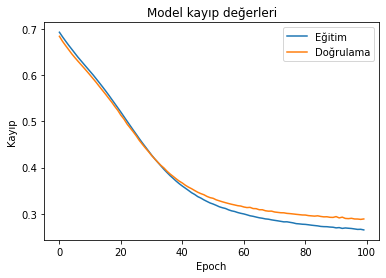

In [47]:
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Model kayıp değerleri")
plt.ylabel("Kayıp")
plt.xlabel("Epoch")
plt.legend(["Eğitim","Doğrulama"], loc="upper right")
plt.show()

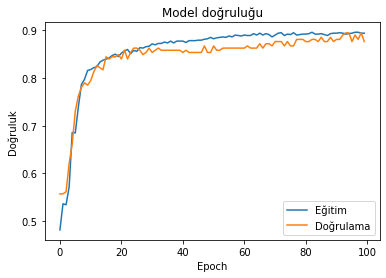

In [48]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("Model doğruluğu")
plt.ylabel("Doğruluk")
plt.xlabel("Epoch")
plt.legend(["Eğitim","Doğrulama"], loc="lower right")
plt.show()

Yorum: Eğitim setindeki modelimizdeki gelişmeler, doğrulama setindeki gelişmelerle biraz eşleştiğinden, modelimizde aşırı eğitim büyük bir sorun gibi görünmüyor.

Sinir ağına düzenlilik ekleme

In [49]:
# Sinir ağımıza düzenlilik kazandırmak için, eğitim setimize kötü bir şekilde uyacak bir sinir ağı ile formüle edelim.
# Bu modeli de 2 olarak adlandıralım.

In [50]:
model_2 = Sequential([
    Dense(1000, activation="relu", input_shape=(10,)),
    Dense(1000, activation="relu"),
    Dense(1000, activation="relu"),
    Dense(1000, activation="relu"),
    Dense(1, activation="sigmoid"),
])

model_2.compile(optimizer="adam",
               loss="binary_crossentropy",
               metrics=["accuracy"]
               )

hist_2=model_2.fit(X_egitim, Y_egitim, 
                   batch_size=32, epochs=100, 
                   validation_data=(X_dogrulama, Y_dogrulama))

Epoch 1/100
32/32 [==============================] - 2s 34ms/step - loss: 0.4678 - accuracy: 0.7906 - val_loss: 0.4319 - val_accuracy: 0.8311
Epoch 2/100
32/32 [==============================] - 1s 32ms/step - loss: 0.3687 - accuracy: 0.8405 - val_loss: 0.3597 - val_accuracy: 0.8311
Epoch 3/100
32/32 [==============================] - 1s 29ms/step - loss: 0.2971 - accuracy: 0.8728 - val_loss: 0.3223 - val_accuracy: 0.8493
Epoch 4/100
32/32 [==============================] - 1s 29ms/step - loss: 0.2731 - accuracy: 0.8933 - val_loss: 0.3413 - val_accuracy: 0.8630
Epoch 5/100
32/32 [==============================] - 1s 30ms/step - loss: 0.2849 - accuracy: 0.8738 - val_loss: 0.3333 - val_accuracy: 0.8813
Epoch 6/100
32/32 [==============================] - 1s 29ms/step - loss: 0.2612 - accuracy: 0.8885 - val_loss: 0.3770 - val_accuracy: 0.8447
Epoch 7/100
32/32 [==============================] - 1s 31ms/step - loss: 0.2699 - accuracy: 0.8943 - val_loss: 0.2984 - val_accuracy: 0.8767
Epoch 

32/32 [==============================] - 1s 30ms/step - loss: 0.1425 - accuracy: 0.9315 - val_loss: 0.3664 - val_accuracy: 0.9178
Epoch 59/100
32/32 [==============================] - 1s 30ms/step - loss: 0.1471 - accuracy: 0.9374 - val_loss: 0.3914 - val_accuracy: 0.9041
Epoch 60/100
32/32 [==============================] - 1s 31ms/step - loss: 0.1309 - accuracy: 0.9432 - val_loss: 0.4021 - val_accuracy: 0.8858
Epoch 61/100
32/32 [==============================] - 1s 30ms/step - loss: 0.1450 - accuracy: 0.9335 - val_loss: 0.4425 - val_accuracy: 0.8767
Epoch 62/100
32/32 [==============================] - 1s 33ms/step - loss: 0.1460 - accuracy: 0.9364 - val_loss: 0.3500 - val_accuracy: 0.8858
Epoch 63/100
32/32 [==============================] - 1s 30ms/step - loss: 0.1330 - accuracy: 0.9413 - val_loss: 0.3784 - val_accuracy: 0.8995
Epoch 64/100
32/32 [==============================] - 1s 30ms/step - loss: 0.1275 - accuracy: 0.9442 - val_loss: 0.4074 - val_accuracy: 0.8995
Epoch 65/100

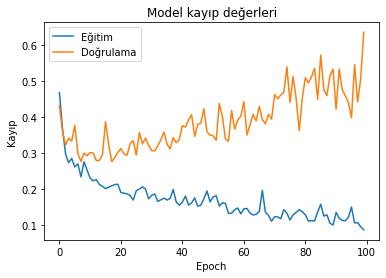

In [51]:
plt.plot(hist_2.history["loss"])
plt.plot(hist_2.history["val_loss"])
plt.title("Model kayıp değerleri")
plt.ylabel("Kayıp")
plt.xlabel("Epoch")
plt.legend(["Eğitim","Doğrulama"], loc="upper left")
plt.show()

 Yorum: Yukarıdaki grafik aşırı uyumun açık bir işaretidir. Eğitim veri seti için 
kayıp azalırken, doğrulama veri seti için kayıp eğitim veri seti için kaybın
çok üsütnde ve artıyor.

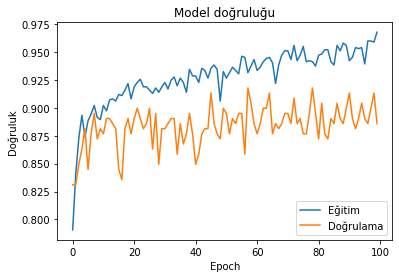

In [52]:
# Doğruluk için;
plt.plot(hist_2.history["accuracy"])
plt.plot(hist_2.history["val_accuracy"])
plt.title("Model doğruluğu")
plt.ylabel("Doğruluk")
plt.xlabel("Epoch")
plt.legend(["Eğitim","Doğrulama"], loc="lower right")
plt.show()

 Yorum: Eğitim ve doğrulama veri setleri için doğruluk değeri arasında da daha net bir sapma görülebilir. Bu da aşırı eğitim problemini göstermektedir.

 Şimdi aşırı eğitimi azaltmak için bazı stratejileri deneyelim(mimarimizi ilk modelimize geri döndürmenin yerine)

In [59]:
from keras.layers import Dropout
from keras import regularizers

In [60]:
model_3 = Sequential([
    Dense(1000, activation="relu", kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),    # cezalandirma terimi
    Dense(1000, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation="sigmoid", kernel_regularizer=regularizers.l2(0.01)),
])

In [61]:
model_3.compile(optimizer="adam",
               loss="binary_crossentropy",
               metrics=["accuracy"])

hist_3 = model_3.fit(X_egitim, Y_egitim,
                    batch_size=32, epochs=100,
                    validation_data=(X_dogrulama, Y_dogrulama))

Epoch 1/100
32/32 [==============================] - 3s 57ms/step - loss: 14.2269 - accuracy: 0.6859 - val_loss: 3.8679 - val_accuracy: 0.8539
Epoch 2/100
32/32 [==============================] - 2s 48ms/step - loss: 1.6641 - accuracy: 0.8454 - val_loss: 0.6665 - val_accuracy: 0.8630
Epoch 3/100
32/32 [==============================] - 1s 47ms/step - loss: 0.5629 - accuracy: 0.8699 - val_loss: 0.5880 - val_accuracy: 0.8356
Epoch 4/100
32/32 [==============================] - 2s 47ms/step - loss: 0.5304 - accuracy: 0.8679 - val_loss: 0.5423 - val_accuracy: 0.8356
Epoch 5/100
32/32 [==============================] - 2s 47ms/step - loss: 0.4792 - accuracy: 0.8885 - val_loss: 0.4960 - val_accuracy: 0.8721
Epoch 6/100
32/32 [==============================] - 1s 43ms/step - loss: 0.4973 - accuracy: 0.8601 - val_loss: 0.5049 - val_accuracy: 0.8539
Epoch 7/100
32/32 [==============================] - 1s 46ms/step - loss: 0.5217 - accuracy: 0.8591 - val_loss: 0.5686 - val_accuracy: 0.8356
Epoch

32/32 [==============================] - 1s 46ms/step - loss: 0.4316 - accuracy: 0.8796 - val_loss: 0.4669 - val_accuracy: 0.8767
Epoch 59/100
32/32 [==============================] - 1s 45ms/step - loss: 0.4333 - accuracy: 0.8826 - val_loss: 0.4700 - val_accuracy: 0.8721
Epoch 60/100
32/32 [==============================] - 1s 46ms/step - loss: 0.4321 - accuracy: 0.8904 - val_loss: 0.4555 - val_accuracy: 0.8904
Epoch 61/100
32/32 [==============================] - 2s 47ms/step - loss: 0.4359 - accuracy: 0.8865 - val_loss: 0.4270 - val_accuracy: 0.9041
Epoch 62/100
32/32 [==============================] - 2s 47ms/step - loss: 0.4370 - accuracy: 0.8826 - val_loss: 0.4278 - val_accuracy: 0.9041
Epoch 63/100
32/32 [==============================] - 2s 47ms/step - loss: 0.4291 - accuracy: 0.8845 - val_loss: 0.4250 - val_accuracy: 0.8995
Epoch 64/100
32/32 [==============================] - 2s 50ms/step - loss: 0.4331 - accuracy: 0.8885 - val_loss: 0.4329 - val_accuracy: 0.8950
Epoch 65/100

In [62]:
# Bu model için de kayıp ve doğruluk grafiklerini çizelim.

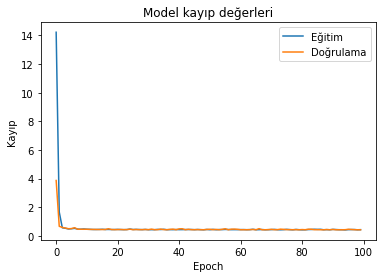

In [63]:
# Kayıp için;
plt.plot(hist_3.history["loss"])
plt.plot(hist_3.history["val_loss"])
plt.title("Model kayıp değerleri")
plt.ylabel("Kayıp")
plt.xlabel("Epoch")
plt.legend(["Eğitim","Doğrulama"], loc="upper right")
plt.show()

Yorum: Doğrulama veri seti için kaybın eğitim veri seti kaybına yakın olduğu görülebilir.
Dolayısıyla aşırı eğitimin problem olmadığı açıktır.    

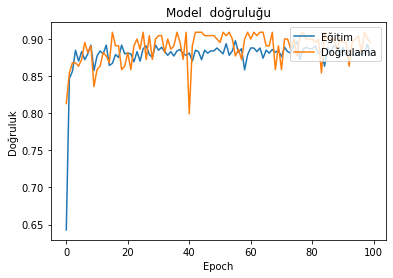

In [58]:
# Doğruluk için;
plt.plot(hist_3.history["accuracy"])
plt.plot(hist_3.history["val_accuracy"])
plt.title("Model  doğruluğu")
plt.ylabel("Doğruluk")
plt.xlabel("Epoch")
plt.legend(["Eğitim","Doğrulama"], loc="upper right")
plt.show()

Yorum: L2 düzenleme ve dropout ile aşırı eğitim probleminin çözüldüğü yukarıdaki grafikten de kolayca anlaşılabilir.